## 데이터 셋을 웹에서 다운로드

In [2]:
!git clone https://github.com/ndb796/weather_dataset

fatal: destination path 'weather_dataset' already exists and is not an empty directory.


데이터를 다운로드 받았으므로, 폴더로 이동

In [7]:
%cd weather_dataset

[WinError 2] 지정된 파일을 찾을 수 없습니다: 'weather_dataset'
e:\myStudy\Deeplearning\keras\06_model\weather_dataset


기본 패키지를 로드한다. tensorflow 아래 keras의 주요 라이브러리와 numnpy, 그리고 matplotlib

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


import numpy as np
import matplotlib.pyplot as plt

In [9]:
#dataset loader setup

train_generator = ImageDataGenerator(
    rescale=1/255.,
    #horizontal_flip=True,
    validation_split = 0.2
)

test_generator = ImageDataGenerator(
    rescale=1/255.
)

Train data를 다시 Train / valid 로 8:2로 나누기 위해서 validation_split 옵션을 주었다. 이렇게 주면 Generator 에서 subset 을 training / validation 으로 나눠서 가져올 수 있다.

In [11]:
train_flow = train_generator.flow_from_directory(
    directory='./train/',
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64,
    subset='training'
)

val_flow = train_generator.flow_from_directory(
    directory='./train/',
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64,
    subset='validation'
)

test_flow = test_generator.flow_from_directory(
    directory='./test/',
    shuffle = False,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64
)

Found 676 images belonging to 4 classes.
Found 168 images belonging to 4 classes.
Found 281 images belonging to 4 classes.


# data set 종류

간단하게 나누면 아래와 같이 나눠진다. 우리가 다루는 데이터는 이겨서 범주형이므로 categorical 이라는 모드로 가져왔다.

1) 수치형
  점수 -> 100, 99, 98 ...   (99.5) 


2) 범주형    
   아침, 점심, 저녁 
   수학, 과학, 영어 


class 가 4개인 categorical 데이터이며, 각각 차례로 0은 흐림, 1은 비옴, 2는 맑음, 3은 일출 사진이다. 나중에 라벨을 쉽게 알아보기 위해서 아래와 같이 딕셔너리를 미리 만들어둔다.

In [12]:
class_names = { 
    0: "흐림", 
    1: "비",
    2: "맑음",
    3: "일출" 
}

train_flow 는 일종의 iterator 이므로, next() 함수를 통해서 차례로 데이터를 가져올 수 있다. 위에서 batch_size 를 64로 지정해주었으므로, 한번에 64개씩 로드가 된다.

In [15]:
images,targets = next(train_flow)

print(images.shape, targets.shape)

(64, 224, 224, 3) (64, 4)


In [20]:
images[0].shape

(224, 224, 3)

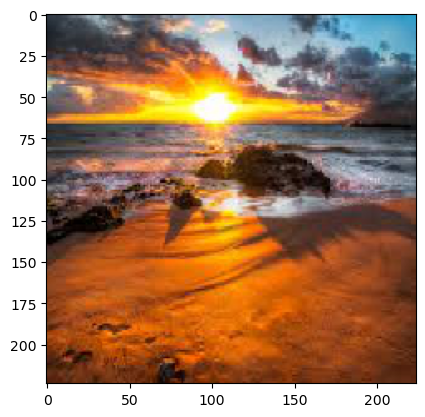

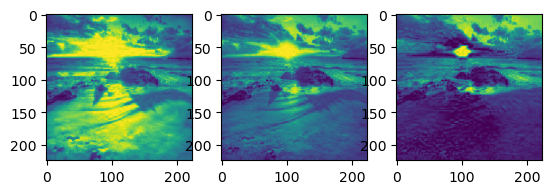

In [28]:
plt.imshow(images[0])
plt.show()

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[0][:,:,i]) ## Red, Green, Blue 를 각각 그렸을 때 

 images : 224 x 224 짜리 그림이 n개 있는거 

 targets : 정답 ( 4 x n 개 )  


   -> 3, 2, 1, 0, .... (X) \
   ->  [0, 0, 0, 1], \
       [0, 0, 1, 0], \
       [0, 1, 0, 0]  (O)

In [ ]:
class_names = { 
    0: "흐림", 
    1: "비",
    2: "맑음",
    3: "일출" 
}

맑음


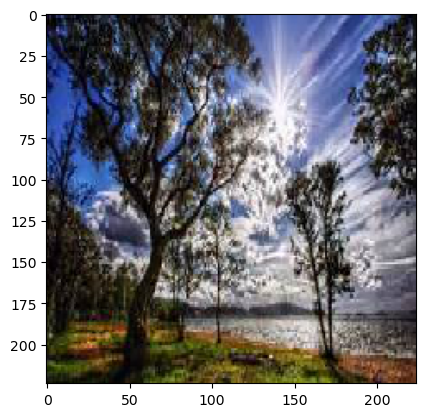

흐림


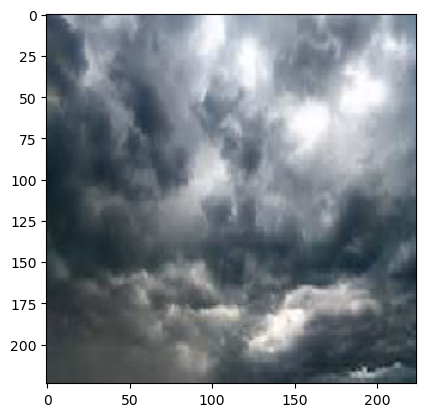

흐림


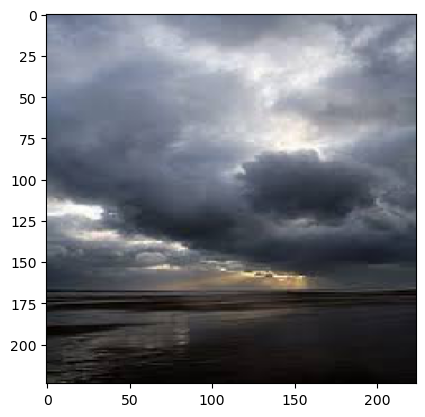

일출


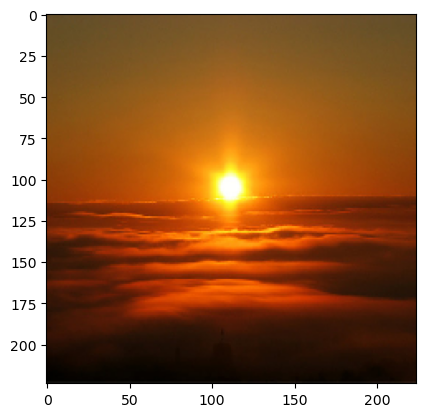

흐림


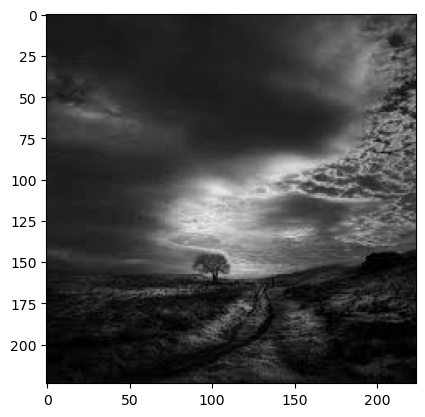

In [61]:
for i in range(5):
    print(class_names[np.argmax(targets[i])])
    #print(targets[i])
    plt.imshow( images[i] )
    plt.show()

In [64]:
## simpel model 
model  = Sequential()

model.add( layers.InputLayer(shape=(224, 224, 3))) 
model.add( layers.Flatten() )
model.add( layers.Dense(4, activation='softmax')) 



In [26]:
## deeper model

model2 = Sequential()

model2.add( layers.InputLayer(shape=(224, 224, 3)))
model2.add( layers.Flatten() ) 
model2.add( layers.Dense(64, activation='relu'))
model2.add( layers.Dense(4, activation='softmax'))



In [82]:
## more deeper model

model3 = Sequential()

#model3.add(layers.InputLayer(shape=(224, 224, 3)))
model3.add( layers.Flatten() ) 
model3.add( layers.Dense(128, activation='relu'))
model3.add( layers.Dense(64, activation='relu'))
model3.add( layers.Dense(32, activation='relu'))
model3.add( layers.Dense(4, activation='softmax'))




In [83]:
model3.compile( optimizer= 'sgd', loss = 'crossentropy', metrics=['accuracy'] )
history = model3.fit(train_flow, epochs=30, validation_data=val_flow)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.2554 - loss: 4.0185 - val_accuracy: 0.3214 - val_loss: 1.8489
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.4846 - loss: 1.2839 - val_accuracy: 0.5238 - val_loss: 1.0197
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.5867 - loss: 0.9762 - val_accuracy: 0.6131 - val_loss: 0.9123
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.5934 - loss: 0.9322 - val_accuracy: 0.5774 - val_loss: 0.9023
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.6293 - loss: 0.8796 - val_accuracy: 0.6131 - val_loss: 0.8447
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.6801 - loss: 0.7948 - val_accuracy: 0.6845 - val_loss: 0.8423
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.6865 - loss: 0.7411 - val_accuracy: 0.7262 - val_loss: 0.8552
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.6764 - loss: 0.7649 - val_accuracy: 0.

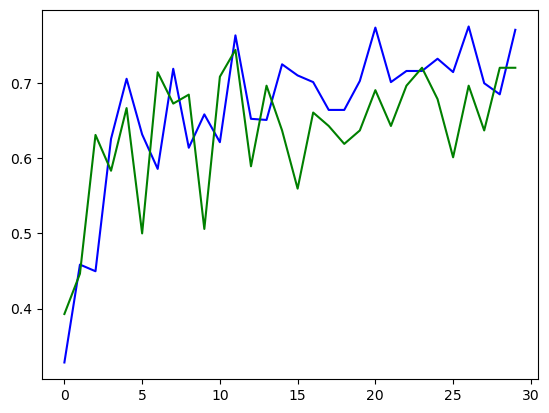

In [67]:
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'green')

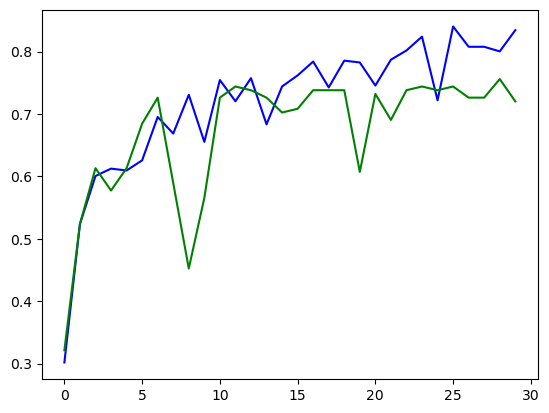

In [84]:
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'green')

## model 설계한다음에

데이터를 가지고 맞추고, 그 결과를 가지고 weight 를 업데이트 해라 ->  model.fit  -> x도 알려주고, y도 알려주고 , .... 

데이터를 가지고 예측만 해라 -> model.predict -> x만 알려주면 

데이터를 가지고 예측하고, 그 결과를 보여줘라 (대신 학습은은 하지마라) -> model.eval  -> x도 알려주고,  y도 알려줘야함 


In [85]:
# model.fit(train_flow, epochs=30, validation_data=val_flow)
model3.evaluate(test_flow)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7874 - loss: 0.5486 


[0.5222225785255432, 0.8042704463005066]

In [ ]:
model2.compile( optimizer= 'sgd', loss = 'crossentropy', metrics=['accuracy'] )
history2 = model2.fit(train_flow, epochs=30, validation_data=val_flow)

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

In [ ]:
model3.compile( optimizer= 'sgd', loss = 'crossentropy', metrics=['accuracy'] )
history3 = model3.fit(train_flow, epochs=30, validation_data=val_flow)

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])